In [89]:
# Importing data from the drive
from google.colab import drive
drive.mount('/content/mydrive')


Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [90]:
# Importing neccary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures


In [91]:
# Assigning data to pandas dataframe
df_train = pd.read_csv('/content/mydrive/MyDrive/playground-series-s3e24/train.csv')
df_test = pd.read_csv('/content/mydrive/MyDrive/playground-series-s3e24/test.csv')

# EDA

In [92]:
df_train.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [93]:
df_test.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1


In [94]:
df_train.isna().sum() # Checking Null values in the data

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [95]:
df_train.shape # checking number of rows and cols in training data

(159256, 24)

In [96]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [97]:
df_train.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


In [98]:
df_train['smoking'].value_counts()

0    89603
1    69653
Name: smoking, dtype: int64

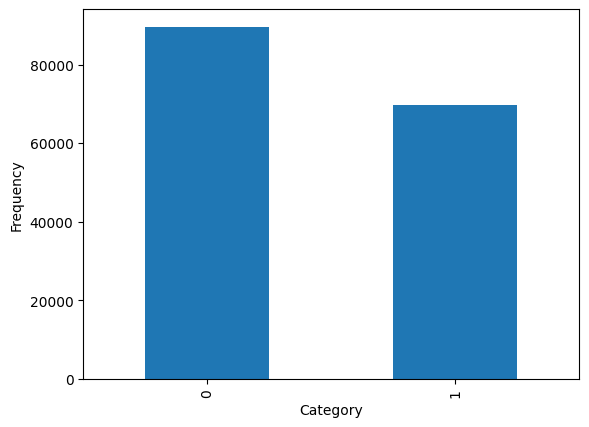

In [99]:
category_count = df_train['smoking'].value_counts()
category_count.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

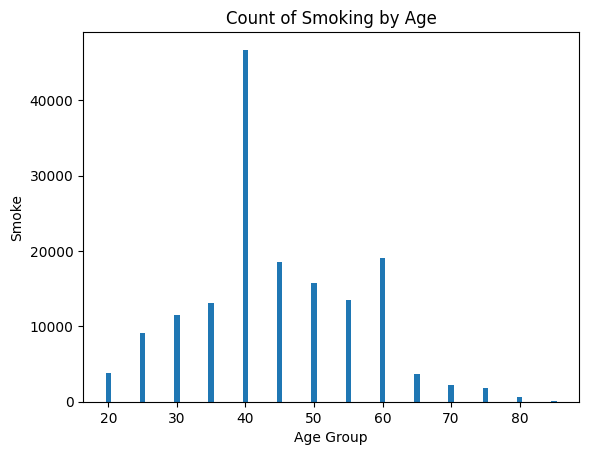

In [100]:
age_group = df_train.groupby('age')['smoking'].count().reset_index()

plt.bar(age_group['age'], age_group['smoking'])
plt.xlabel('Age Group')
plt.ylabel('Smoke')
plt.title('Count of Smoking by Age')
plt.show()

# Outlier Removal

In [101]:
# The approach is to remove data points where the z score is above 3
print("Shape before : ", df_train.shape)
z_scored = stats.zscore(df_train['age'])
df_train = df_train[(z_scored < 3)]
print("Shape after : ", df_train.shape)

Shape before :  (159256, 24)
Shape after :  (158574, 24)


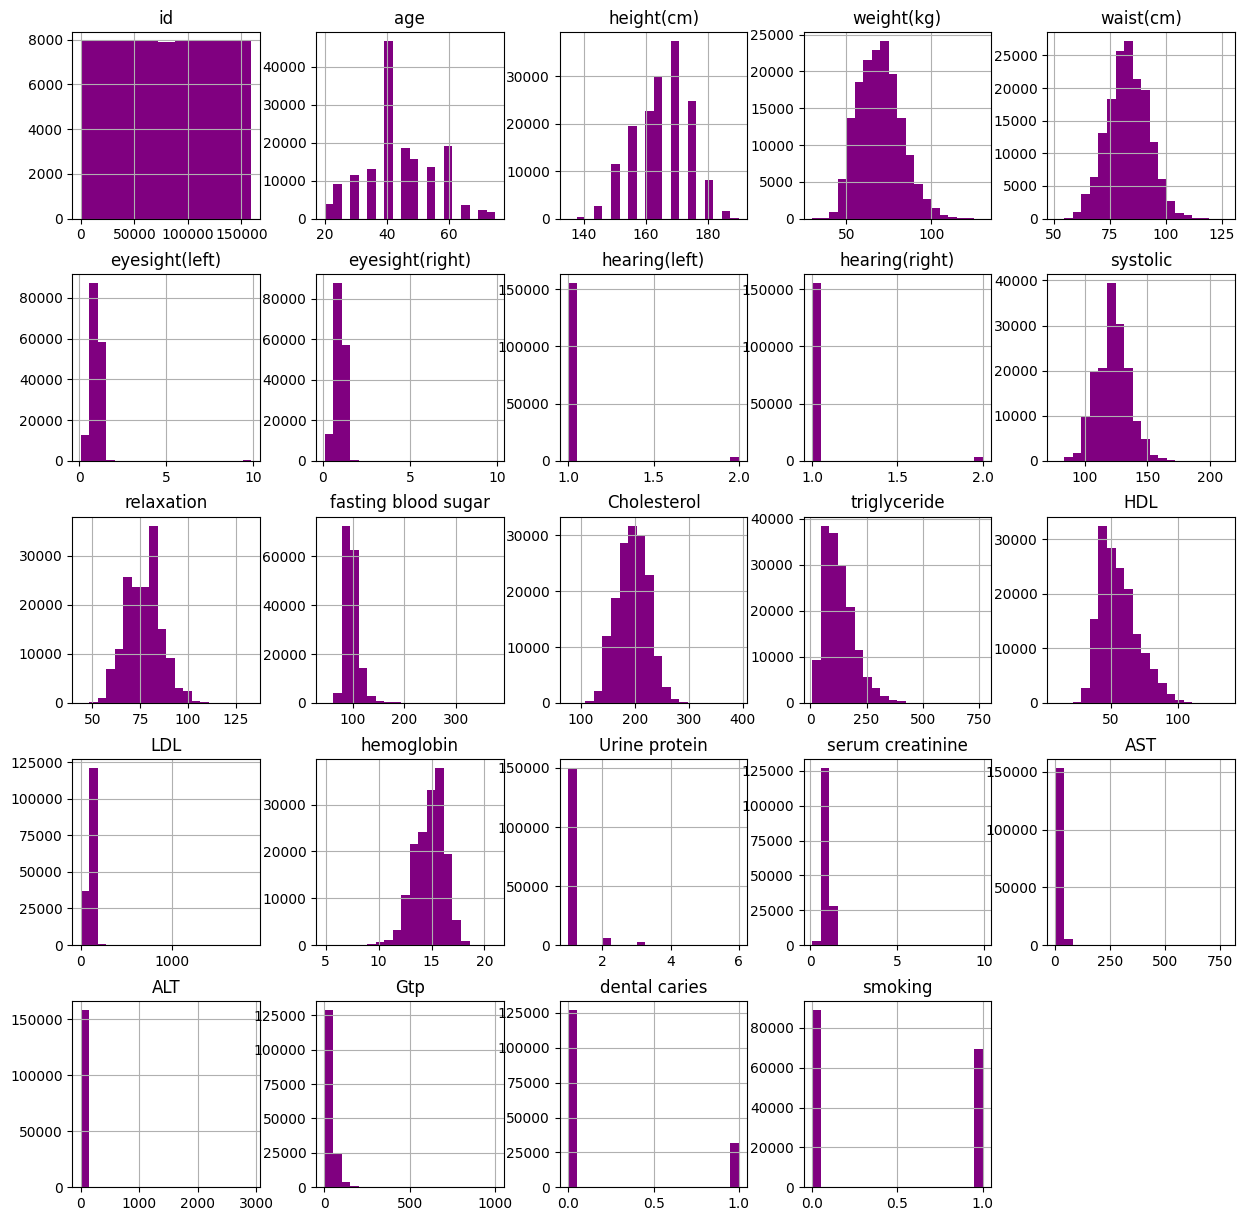

In [102]:
df_train.hist(bins=20,figsize=(15,15),color='purple')
plt.show()

# Feature Scaling

In [103]:
y= df_train['smoking']
X = df_train.drop(columns = ['id','smoking'], axis=1) # Assigning classification variable to y and rest to X


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=17,shuffle=True) # Dividing data to training and testing

In [105]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [106]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape) # size of training and testing data

(111001, 22) (47573, 22) (111001,) (47573,)


## Models

1. Naive Bayes

In [107]:
# Naive Bayes

NB = GaussianNB()
NB.fit(X_train_scaled,y_train)
y_pred = NB.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy : ", accuracy)



Accuracy :  0.7230782166354865


2. Decision Tree

In [108]:
DT = DecisionTreeClassifier(max_depth=12,criterion='gini',random_state=42,min_samples_split=3,min_samples_leaf=1)
DT.fit(X_train_scaled,y_train)
y_pred = DT.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy for Decision Tree : ", accuracy)

Accuracy for Decision Tree :  0.7488701574422466


3. Support Vector Classifier

In [109]:
#SV = SVC(kernel='linear')
#SV.fit(X_train, y_train)
#y_pred = SV.predict(X_test)
#accuracy = accuracy_score(y_test,y_pred)

#print("Accuracy of SVC is : ", accuracy)


4. Logistic Regression

In [110]:
LR  = LogisticRegression(max_iter =1000)
LR.fit(X_train_scaled, y_train)
y_pred = LR.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of Logistic Regression : ", accuracy)



Accuracy of Logistic Regression :  0.7492275029953965


5. Random Forest Classifier

In [111]:
RF = RandomForestClassifier(n_estimators=100,criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,random_state=42)
RF.fit(X_train_scaled,y_train)
y_pred = RF.predict(X_test_scaled)
accuracy  = accuracy_score(y_test,y_pred)

print("Accurcay of Random Forest : ", accuracy)

Accurcay of Random Forest :  0.7740314884493305


6. Gradient Boosting

In [112]:
GB = GradientBoostingClassifier(n_estimators = 100, max_depth = 10, learning_rate=1.0, random_state=42)
GB.fit(X_train, y_train)
y_predict = GB.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of Gradient Boosting Classifier : ", accuracy)

Accuracy of Gradient Boosting Classifier :  0.7740314884493305


In [113]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QD = QuadraticDiscriminantAnalysis()
QD.fit(X_train,y_train)
y_predict = QD.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)

print("Accuracy of QuadraticDiscriminant Analysis is : ",accuracy)



Accuracy of QuadraticDiscriminant Analysis is :  0.7363000021020326


7. Extra Tree Classifier

In [114]:
from sklearn.ensemble import ExtraTreesClassifier

ETC = ExtraTreesClassifier(n_estimators=100, random_state = 42)
ETC.fit(X_train,y_train)
y_predict = ETC.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
print("Accuracy of Extra Tree Classifier : ", accuracy)

Accuracy of Extra Tree Classifier :  0.7691127320118555


8. KNN Classifier

In [115]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy of KNN is : ", accuracy)

Accuracy of KNN is :  0.704496247871692


9. MLP Classifier

In [116]:
from sklearn.neural_network import MLPClassifier
NC = MLPClassifier(solver='adam',alpha=0.0001,random_state=42,learning_rate='adaptive')
NC.fit(X_train,y_train)
y_predict = NC.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

0.7552182960923213


10. Voting Classifier

In [117]:
from sklearn.ensemble import VotingClassifier
voting_model_hard = VotingClassifier(estimators=[('dt',DT),('Rf',RF ),('Gradient Boosting',GB)], voting='hard')
voting_model_soft = VotingClassifier(estimators=[('dt',DT),('Rf',RF),('Gradient Boosting',GB)], voting='soft')

In [118]:
voting_model_hard.fit(X_train, y_train)
voting_model_soft.fit(X_train, y_train)
y_pred_hard = voting_model_hard.predict(X_test)
y_pred_soft = voting_model_soft.predict(X_test)



In [119]:
accuracy_1 = accuracy_score(y_test,y_pred_hard)
accuracy_2 = accuracy_score(y_test,y_pred_soft)

print(accuracy_1, accuracy_2)

0.7701217076913375 0.7648245853740567


In [120]:
df_test.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1


## Model on the test data

In [121]:
df_test_copy = df_test.copy()
df_test_copy = df_test_copy.drop(columns=['id'],axis=1)
X_scaled =  scaler.transform(df_test_copy)
y_pred_final = RF.predict(X_scaled)

print(y_pred_final)
print(len(y_pred_final))

[1 0 0 ... 0 0 0]
106171


In [122]:
final_df = pd.DataFrame({'id':df_test['id'],'smoking':y_pred_final})

In [123]:
csv_file_path = r'C:\Users\ASUS\Downloads\final.csv'
final_df.to_csv(csv_file_path, index=False)